## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.ffill()

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The LLR Test

In [5]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [6]:
import warnings
warnings.filterwarnings("ignore")

## Creating Returns

In [7]:
df.loc[:, 'returns'] = df['market_value'].pct_change(1) * 100


In [8]:
df.head()

,market_value,returns
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166


## ACF for Returns

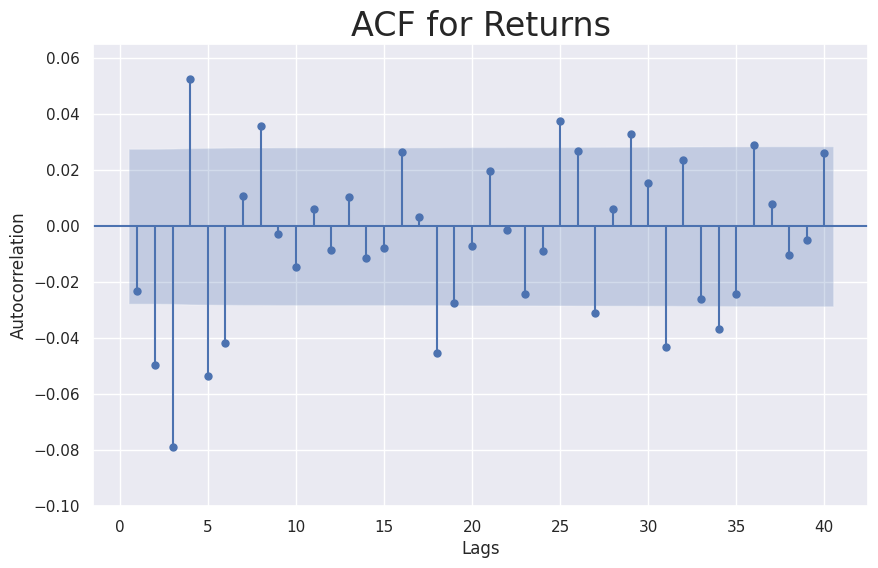

In [9]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Suponiendo que df.returns[1:] contiene tus datos de retorno
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(df.returns[1:], zero=False, lags=40, ax=ax)
plt.title("ACF for Returns", size=24)
plt.ylim(-0.1, 0.065)  # Establece los límites del eje Y
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


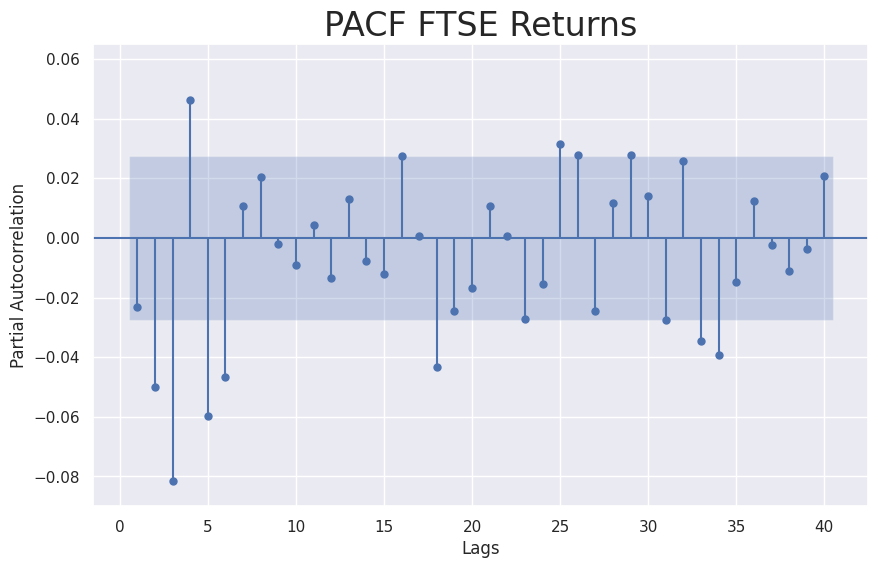

In [10]:
# Suponiendo que df.returns[1:] contiene tus datos de retorno
fig, ax = plt.subplots(figsize=(10, 6))
sgt.plot_pacf(df.returns[1:], lags=40, zero=False, method='ols', ax=ax)
plt.title("PACF FTSE Returns", size=24)
plt.ylim(-0.09, 0.065)  # Establece los límites del eje Y
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()


## MA(1) for Returns

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7929.595
Date:                Tue, 27 Feb 2024   AIC                          15865.190
Time:                        22:22:19   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.146      0.252      -0.013       0.051
ma.L1         -0.0257      0.009     -3.018      0.003      -0.042      -0.009
sigma2         1.3789      0.014     99.990      0.0

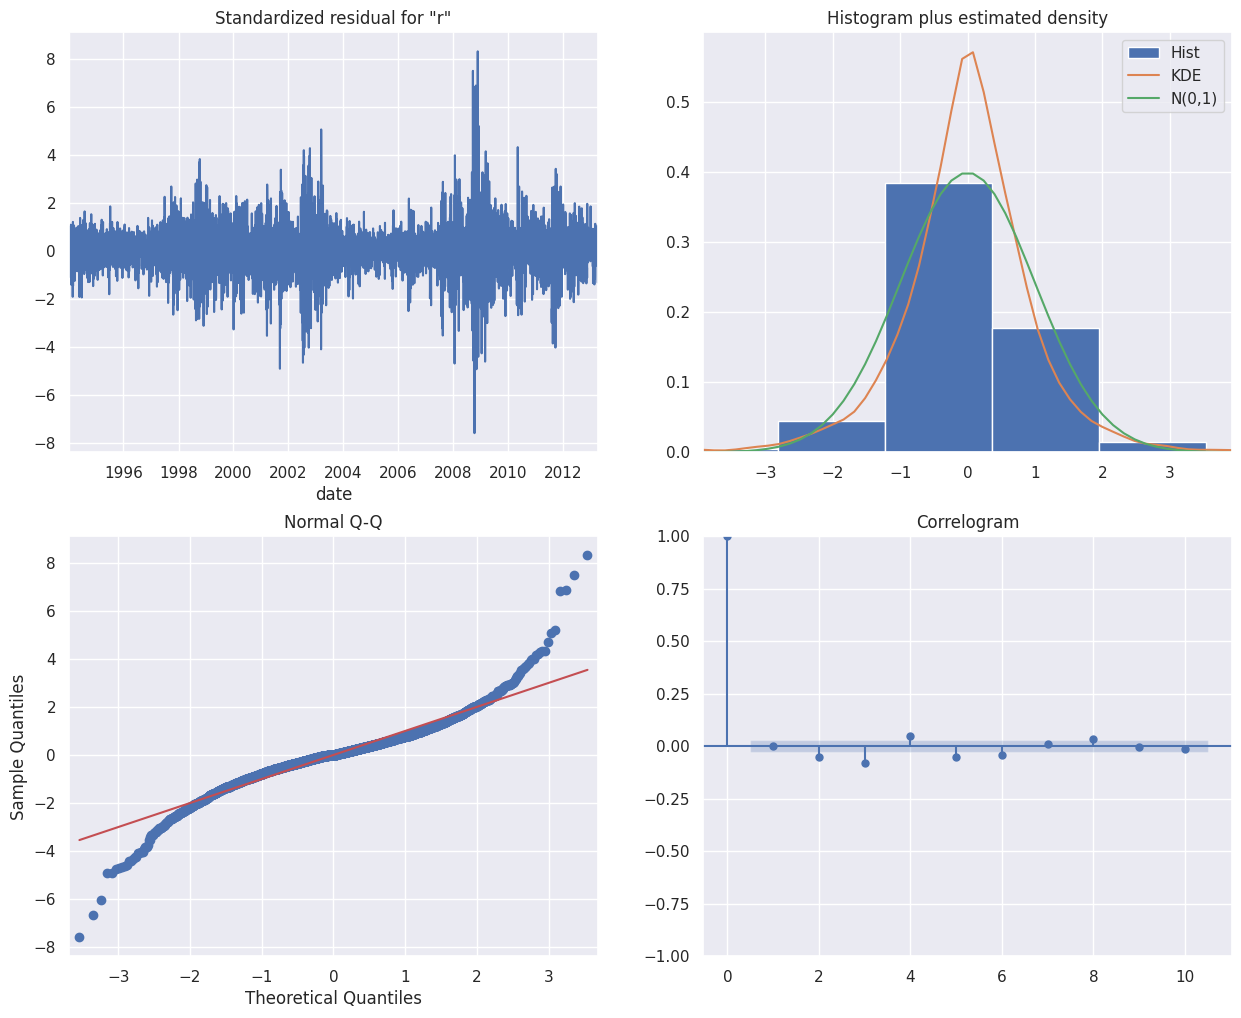

In [11]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Ajustar el modelo ARIMA
model_ret_ma_1 = ARIMA(df.returns[1:], order=(0, 0, 1))
results_ret_ma_1 = model_ret_ma_1.fit()

# Mostrar el resumen del modelo
print(results_ret_ma_1.summary())

# Mostrar los diagnósticos del modelo
results_ret_ma_1.plot_diagnostics(figsize=(15, 12))
plt.show()


## Higher-Lag MA Models for Returns

In [12]:
# Ajustar un modelo ARIMA(0, 0, 2)
model_ret_ma_2 = ARIMA(df.returns[1:], order=(0, 0, 2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_1, results_ret_ma_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -7922.864
Date:                Tue, 27 Feb 2024   AIC                          15853.728
Time:                        22:22:20   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.204      0.228      -0.012       0.049
ma.L1         -0.0327      0.009     -3.760      0.000      -0.050      -0.016
ma.L2         -0.0502      0.008     -6.416      0.0

In [13]:
# Ajustar un modelo ARIMA(0, 0, 3)
model_ret_ma_3 = ARIMA(df.returns[1:], order=(0, 0, 3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_2, results_ret_ma_3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -7904.317
Date:                Tue, 27 Feb 2024   AIC                          15818.634
Time:                        22:22:21   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.296      0.195      -0.010       0.048
ma.L1         -0.0203      0.009     -2.334      0.020      -0.037      -0.003
ma.L2         -0.0556      0.008     -7.032      0.0

In [14]:
# Ajustar un modelo ARIMA(0, 0, 4)
model_ret_ma_4 = ARIMA(df.returns[1:], order=(0, 0, 4))
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_3, results_ret_ma_4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -7898.773
Date:                Tue, 27 Feb 2024   AIC                          15809.547
Time:                        22:22:22   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.236      0.217      -0.011       0.049
ma.L1         -0.0203      0.009     -2.239      0.025      -0.038      -0.003
ma.L2         -0.0551      0.008     -6.835      0.0

In [15]:
# Ajustar un modelo ARIMA(0, 0, 5)
model_ret_ma_5 = ARIMA(df.returns[1:], order=(0, 0, 5))
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_4, results_ret_ma_5)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -7892.823
Date:                Tue, 27 Feb 2024   AIC                          15799.645
Time:                        22:22:23   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.282      0.200      -0.010       0.048
ma.L1         -0.0262      0.009     -2.839      0.005      -0.044      -0.008
ma.L2         -0.0497      0.008     -6.147      0.0

In [16]:
# Ajustar un modelo ARIMA(0, 0, 6)
model_ret_ma_6 = ARIMA(df.returns[1:], order=(0, 0, 6))
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_5, results_ret_ma_6)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -7889.221
Date:                Tue, 27 Feb 2024   AIC                          15794.442
Time:                        22:22:25   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.318      0.188      -0.009       0.047
ma.L1         -0.0237      0.009     -2.562      0.010      -0.042      -0.006
ma.L2         -0.0486      0.008     -5.982      0.0

In [17]:
# Ajustar un modelo ARIMA(0, 0, 7)
model_ret_ma_7 = ARIMA(df.returns[1:], order=(0, 0, 7))
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_6, results_ret_ma_7)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 7)   Log Likelihood               -7889.046
Date:                Tue, 27 Feb 2024   AIC                          15796.091
Time:                        22:22:26   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.303      0.193      -0.010       0.047
ma.L1         -0.0247      0.009     -2.645      0.008      -0.043      -0.006
ma.L2         -0.0488      0.008     -6.000      0.0

In [18]:
# Ajustar un modelo ARIMA(0, 0, 8)
model_ret_ma_8 = ARIMA(df.returns[1:], order=(0, 0, 8))
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_7, results_ret_ma_8)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7885.603
Date:                Tue, 27 Feb 2024   AIC                          15791.205
Time:                        22:22:28   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.253      0.210      -0.011       0.048
ma.L1         -0.0238      0.009     -2.527      0.011      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.053      0.0

In [19]:
LLR_test(results_ret_ma_6, results_ret_ma_8, DF = 2)

0.027

## Residuals for Returns

In [20]:
df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]

In [21]:
df

,market_value,returns,res_ret_ma_8
date,,,
1994-01-07,3445.98,NaN,NaN
1994-01-10,3440.58,-0.156704,NaN
1994-01-11,3413.77,-0.779229,-0.802107
1994-01-12,3372.02,-1.222988,-1.269464
1994-01-13,3360.01,-0.356166,-0.464783
...,...,...,...
2013-04-01,6411.74,0.000000,-0.028597
2013-04-02,6490.66,1.230867,1.269086
2013-04-03,6420.28,-1.084327,-1.088275


In [22]:
print("The mean of the residuals is " + str(round(df.res_ret_ma_8.mean(),3)) + "\nThe variance of the residuals is " + str(round(df.res_ret_ma_8.var(),3)))

The mean of the residuals is -0.0
The variance of the residuals is 1.356


In [23]:
round(sqrt(df.res_ret_ma_8.var()),3)

1.164

In [24]:
1.164*3

3.492

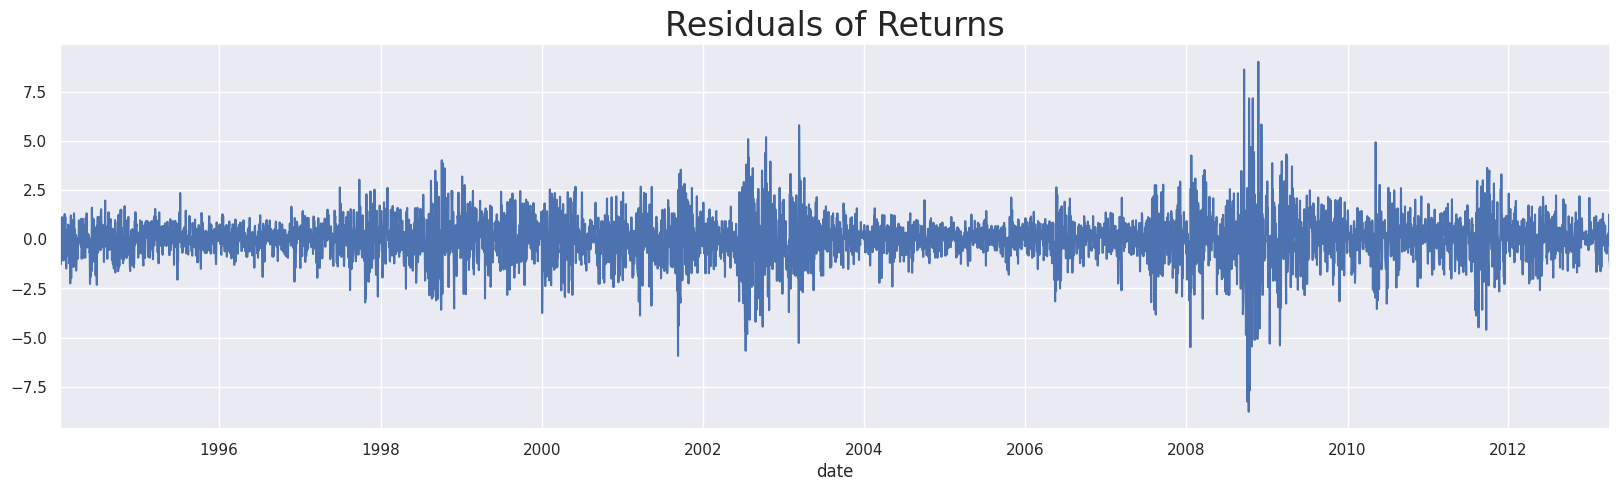

In [25]:
df.res_ret_ma_8[1:].plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 24)
plt.show()

In [27]:
result = sts.adfuller(df.res_ret_ma_8[2:])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Number of Lags Used:', result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
print('Log Likelihood Value:', result[5])

ADF Statistic: -70.83537125557953
p-value: 0.0
Number of Lags Used: 0
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Log Likelihood Value: 15684.052217389382


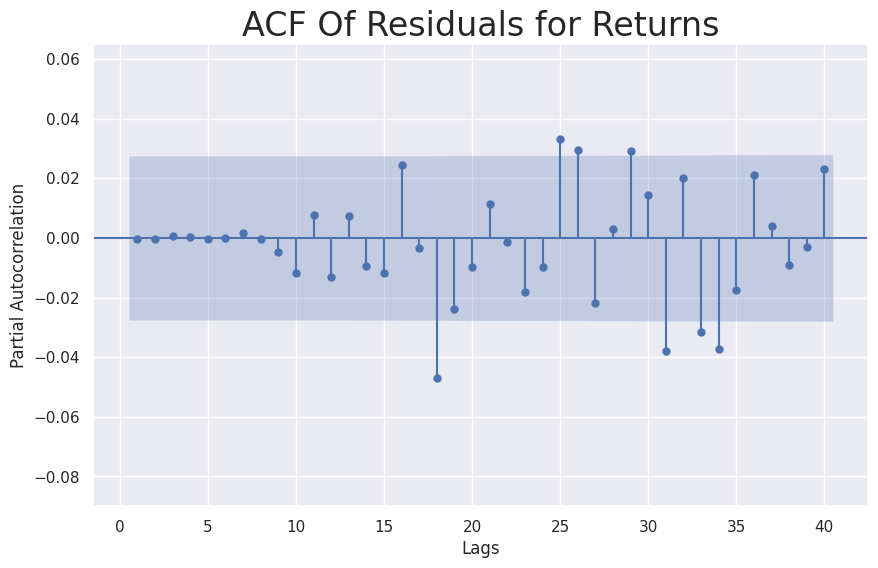

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
sgt.plot_acf(df.res_ret_ma_8[2:], zero = False, lags = 40, ax= ax)
plt.title("ACF Of Residuals for Returns",size=24)
plt.ylim(-0.09, 0.065)  # Establece los límites del eje Y
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

## Normalized Prices

In [ ]:
benchmark = df.market_value.iloc[0]
df['norm'] = df.market_value.div(benchmark).mul(100)

In [ ]:
df.head()

,market_value,returns,res_ret_ma_8,norm
date,,,,
1994-01-07,3445.98,NaN,NaN,100.000000
1994-01-10,3440.58,-0.156704,NaN,99.843296
1994-01-11,3413.77,-0.779229,-0.802107,99.065288
1994-01-12,3372.02,-1.222988,-1.269464,97.853731
1994-01-13,3360.01,-0.356166,-0.464783,97.505209


In [ ]:
sts.adfuller(df['norm'])

(-1.9041551418836287,
 0.3301089327703105,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 19541.17381480549)

## Normalized Returns

In [ ]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

In [ ]:
df.head()

,market_value,returns,res_ret_ma_8,norm,norm_ret
date,,,,,
1994-01-07,3445.98,NaN,NaN,100.000000,NaN
1994-01-10,3440.58,-0.156704,NaN,99.843296,100.000000
1994-01-11,3413.77,-0.779229,-0.802107,99.065288,497.260711
1994-01-12,3372.02,-1.222988,-1.269464,97.853731,780.443046
1994-01-13,3360.01,-0.356166,-0.464783,97.505209,227.285567


In [ ]:
sts.adfuller(df.norm_ret[1:])

(-12.770265719497235,
 7.79805833603833e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)

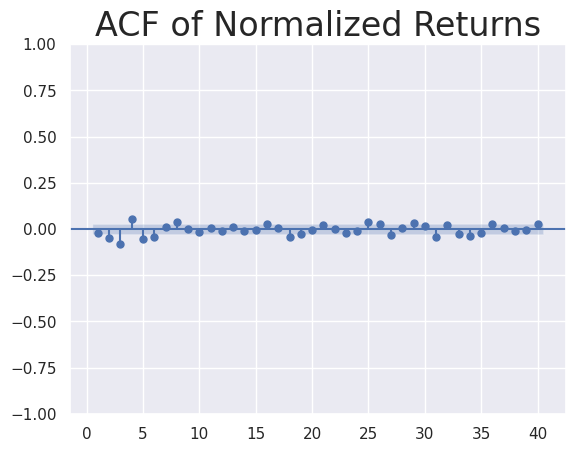

In [ ]:
sgt.plot_acf(df.norm_ret[1:], zero = False, lags = 40)
plt.title("ACF of Normalized Returns",size=24)
plt.show()

In [ ]:
model_norm_ret_ma_8 = ARMA(df.norm_ret[1:], order=(0,8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
results_norm_ret_ma_8.summary()

NameError: name 'ARMA' is not defined

In [ ]:
df['res_norm_ret_ma_8'] = results_norm_ret_ma_8.resid[1:]

In [ ]:
sts.adfuller(df.res_norm_ret_ma_8[2:])

(-70.8358058987761,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '10%': -2.567076687880585,
  '5%': -2.8621161549128313},
 64094.32669974392)

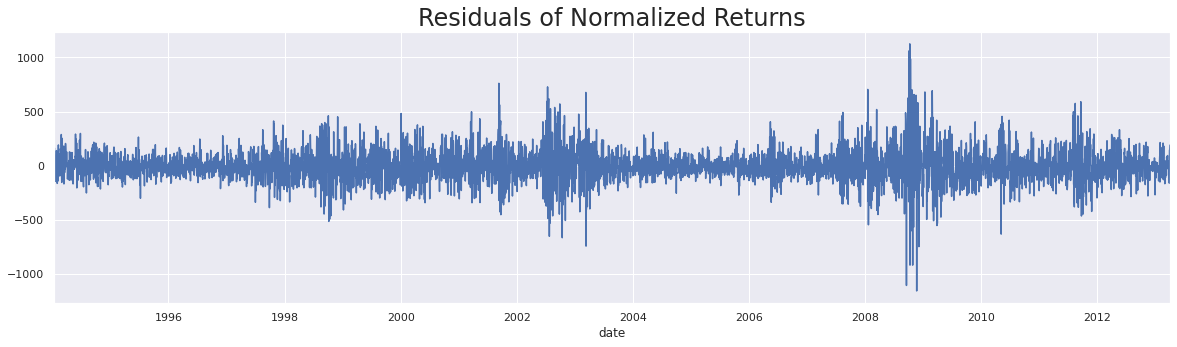

In [ ]:
df.res_norm_ret_ma_8[1:].plot(figsize=(20,5))
plt.title("Residuals of Normalized Returns",size=24)
plt.show()

In [28]:
sgt.plot_acf(df.res_norm_ret_ma_8[2:], zero = False, lags = 40, ax=ax)
plt.title("ACF Of Residuals for Normalized Returns",size=24)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'res_norm_ret_ma_8'

## MA Models For Prices

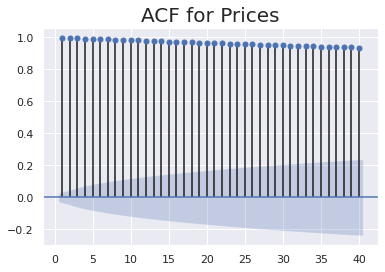

In [ ]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size=20)
plt.show()

In [ ]:
model_ma_1 = ARMA(df.market_value, order=(0,1))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(0, 1)   Log Likelihood              -38629.000
Method:                       css-mle   S.D. of innovations            530.756
Date:                Tue, 21 Apr 2020   AIC                          77264.000
Time:                        10:33:21   BIC                          77283.564
Sample:                    01-07-1994   HQIC                         77270.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6652     14.660    347.192      0.000    5060.933    5118.397
ma.L1.market_value     0.9573      0.003    335.561      0.000       0.952       0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0446           +0.0000j            1.0446            0.5000
-----------------------------------------------------------------------------
"""